# Numpyの確認課題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします．

In [10]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

---

### 問1. `ndarray`の生成

以下の2つの`ndarray`を定義しなさい．
- 観測値 `x`: 初項`0`，末項`5`，項数`100`の等差数列
- ノイズ `noise`: 標準正規分布に従う`100`個の乱数

w0, w1, w2 = 4.063083945479951, 0.9045349870836561, 1.2071999279986358


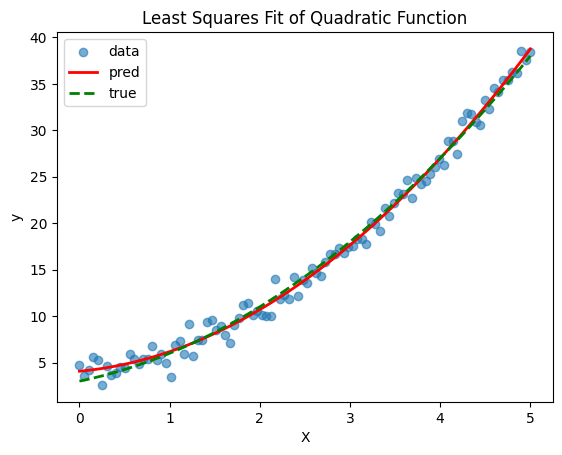

In [20]:


import matplotlib.pyplot as plt
import numpy as np

# 再現性のために乱数シードを設定
np.random.seed(0)

# 観測値 x を初項 0, 末項 5, 項数 100 の等差数列として生成
x = np.linspace(0, 5, 100)

# ノイズを標準正規分布に従う 100 個の乱数として生成
noise = np.random.randn(100)

# 真の関数 t にノイズを加える
t = 3 + 2 * x + x**2 + noise  # 3 + 2x + x^2 + ノイズ

# 行列 X を作成
X = np.vstack([np.ones(x.shape[0]), x, x**2]).T

# パラメータベクトル w を最小二乗法で求める
w = np.linalg.inv(X.T @ X) @ X.T @ t

# 求めたパラメータを表示
print(f'w0, w1, w2 = {w[0]}, {w[1]}, {w[2]}')

# 予測値を計算
pred_y = w[0] + w[1] * x + w[2] * x**2

# 結果を表示
plt.scatter(x, t, label='data', alpha=0.6)
plt.plot(x, pred_y, linewidth=2, color='red', label='pred')
plt.plot(x, 3 + 2 * x + x**2, linewidth=2, color='green', linestyle='dashed', label='true')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Least Squares Fit of Quadratic Function')
plt.show()


---

ここで，真の関数 $y(x) = 3 - 5x + x^2$ を定義します．

w0, w1, w2 = 4.063083945479583, -6.095465012916186, 1.207199927998622


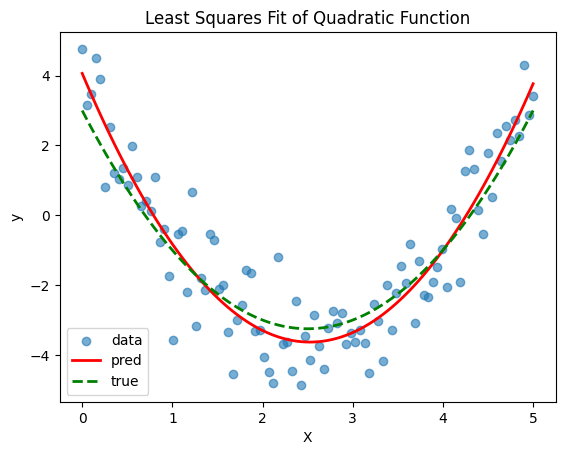

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 再現性のために乱数シードを設定
np.random.seed(0)

# 観測値 x を初項 0, 末項 5, 項数 100 の等差数列として生成
x = np.linspace(0, 5, 100)

# ノイズを標準正規分布に従う 100 個の乱数として生成
noise = np.random.randn(100)

# 真の関数 y(x) = 3 - 5x + x^2 にノイズを加える
t = 3 - 5 * x + x**2 + noise  # 3 - 5x + x^2 + ノイズ

# 行列 X を作成
X = np.vstack([np.ones(x.shape[0]), x, x**2]).T

# パラメータベクトル w を最小二乗法で求める
w = np.linalg.inv(X.T @ X) @ X.T @ t

# 求めたパラメータを表示
print(f'w0, w1, w2 = {w[0]}, {w[1]}, {w[2]}')

# 予測値を計算
pred_y = w[0] + w[1] * x + w[2] * x**2

# 結果を表示
plt.scatter(x, t, label='data', alpha=0.6)
plt.plot(x, pred_y, linewidth=2, color='red', label='pred')
plt.plot(x, 3 - 5 * x + x**2, linewidth=2, color='green', linestyle='dashed', label='true')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Least Squares Fit of Quadratic Function')
plt.show()


### 問2． `ndarray`の操作

問1で生成した観測値 `x` に対応する目標値 `t` を定義しなさい．

目標値 $t$ は， $t = y(x) + \epsilon$ と表されます．  ( $y$: 真の関数, $\epsilon$: ノイズ )  
実際の観測値にはどうしてもノイズ(観測誤差)が発生してしまいます．今回は，それを`noise`で再現します．

問1で観測値を100個生成したので，それぞれに対応する目標値も100個作成する必要がありますが， `for` 文は絶対使ってはいけません．

In [ ]:
import numpy as np

# 再現性のために乱数シードを設定
np.random.seed(0)

# 観測値 x を初項 0, 末項 5, 項数 100 の等差数列として生成
x = np.linspace(0, 5, 100)

# ノイズを標準正規分布に従う 100 個の乱数として生成
noise = np.random.randn(100)

# 真の関数 y(x) = 3 - 5x + x^2
y = 3 - 5 * x + x**2

# 目標値 t は真の関数 y にノイズを加えたもの
t = y + noise

# 結果を表示
print(t)


matplotlib で可視化すると以下のようなグラフになります．
scatter → 散布図

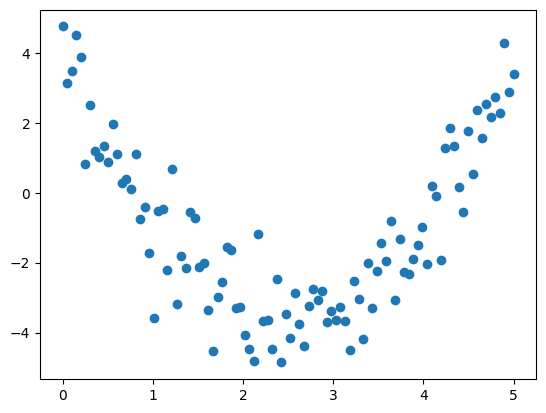

In [22]:
plt.scatter(x, t)

---

### 問3. `ndarray`の結合


\end{array}以下の3つの`ndarray`を垂直方向に結合した2次元配列を転置した行列 `X` を定義しなさい．

- x0: 長さが `x` と同じで要素が全て1の`ndarray`
- x1: 観測値 `x` の各要素を1乗した`ndarray`
- x2: 観測値 `x` の各要素を2乗した`ndarray`

例： $x = (1, 2, 3)$ のとき，

$$
x_0 = (1, 1, 1)\\
x_1 = (1, 2, 3)\\
x_2 = (1, 4, 9)
$$

だから，

$$
X = \left(
\begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 2 & 3 \\
    1 & 4 & 9
\right)^T
= \left(
\begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 2 & 4 \\
    1 & 3 & 9
\end{array}
\right)
$$

ちなみに，機械学習では `X` のような行列を計画行列と呼びます．

In [ ]:
import numpy as np

# 再現性のために乱数シードを設定
np.random.seed(0)

# 観測値 x を初項 0, 末項 5, 項数 100 の等差数列として生成
x = np.linspace(0, 5, 100)

# ノイズを標準正規分布に従う 100 個の乱数として生成
noise = np.random.randn(100)

# 真の関数 y(x) = 3 - 5x + x^2
y = 3 - 5 * x + x**2

# 目標値 t は真の関数 y にノイズを加えたもの
t = y + noise

# x0: 長さが x と同じで要素が全て1の ndarray
x0 = np.ones_like(x)

# x1: 観測値 x の各要素を1乗した ndarray
x1 = x

# x2: 観測値 x の各要素を2乗した ndarray
x2 = x**2

# 3つの ndarray を垂直方向に結合し転置
X = np.vstack([x0, x1, x2]).T

# 結果を表示
print(X)


w0, w1, w2 = 2.8999999999998574, -0.8371428571428126, 0.34285714285714


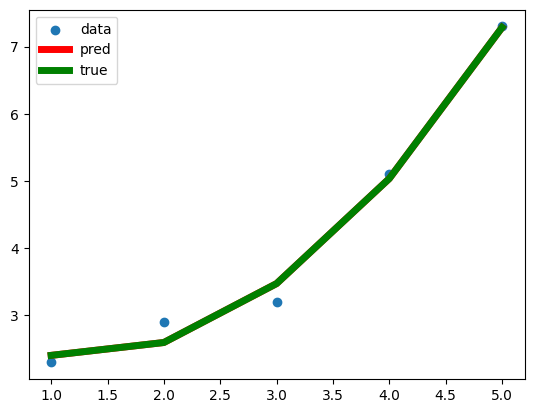

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 観測値Xと真の関数t
x = np.array([1, 2, 3, 4, 5])
t = np.array([2.3, 2.9, 3.2, 5.1, 7.3])

# 行列Xを作成
X = np.vstack([np.ones(x.shape[0]), x, x**2]).T

# パラメータベクトルwを最小二乗法で求める
w = np.linalg.inv(X.T @ X) @ X.T @ t

# 求めたパラメータを表示
print(f'w0, w1, w2 = {w[0]}, {w[1]}, {w[2]}')

# 予測値を計算
pred_y = w[0] + w[1] * x + w[2] * x**2

# 結果を表示
plt.scatter(x, t, label='data')
plt.plot(x, pred_y, linewidth=5, color='red', label='pred')
plt.plot(x, w[0] + w[1] * x + w[2] * x**2, linewidth=5, color='green', label='true')
plt.legend()
plt.show()


---